# Linear regression for prediction

### Website: [Open Canada](http://open.canada.ca)
### Data source: [link](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [61]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://sparkoncept.com/wp-content/uploads/2022/03/17.-What-percentage-of-carbon-emissions-come-from-cars-1536x823.jpg")

In [65]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import datetime as dt
pd.options.mode.chained_assignment = None

In [2]:
# Importing Data

filepath="FuelConsumptionCo2.csv"
df=pd.read_csv(filepath)

### 1. Exploring Data

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape
f"{df.shape[0]} Rows by {df.shape[1]} Columns"

'1067 Rows by 13 Columns'

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB



## Understanding the Data

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### 2. Cleaning up the Data!

In [7]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [9]:
df.rename(columns=str.lower,inplace=True)
df

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [10]:
df.columns

Index(['modelyear', 'make', 'model', 'vehicleclass', 'enginesize', 'cylinders',
       'transmission', 'fueltype', 'fuelconsumption_city',
       'fuelconsumption_hwy', 'fuelconsumption_comb',
       'fuelconsumption_comb_mpg', 'co2emissions'],
      dtype='object')

In [16]:
#Selecting relevant features

df=df[["enginesize","cylinders","fuelconsumption_comb","co2emissions"]]
df

,enginesize,cylinders,fuelconsumption_comb,co2emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [18]:
df=df.rename(columns=({"fuelconsumption_comb":"fuelconsumption","co2emissions":"co2"}))
df

,enginesize,cylinders,fuelconsumption,co2
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


### 3. Analyse Data

In [19]:
emissions=df.copy()

In [20]:
emissions

,enginesize,cylinders,fuelconsumption,co2
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


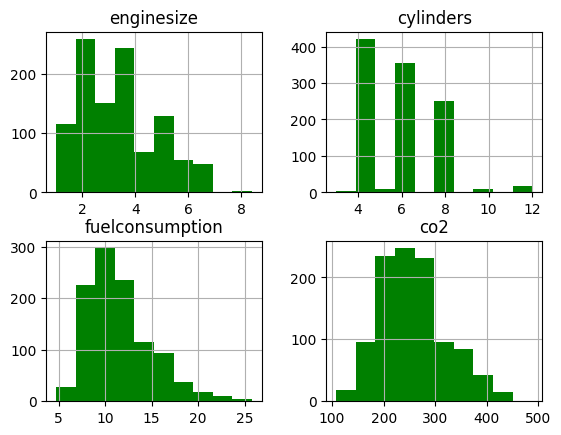

In [23]:
# plotting features

df.hist(color="green")
plt.show()

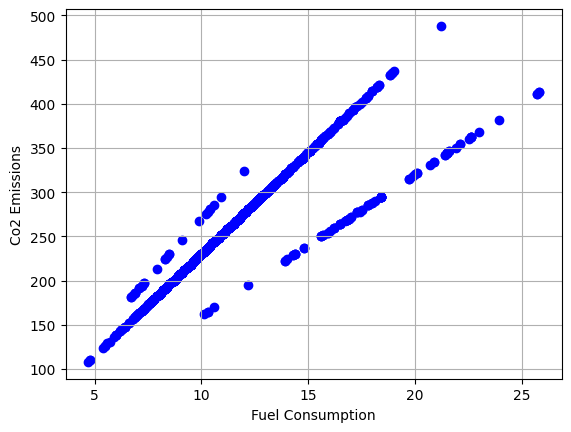

In [63]:
# Plotting these fuel consumption vs Emissions

plt.scatter(emissions.fuelconsumption, emissions.co2,  color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("Co2 Emissions")
plt.grid()
plt.show()

Linear Positive relation as fuel consumption increases so is Co2

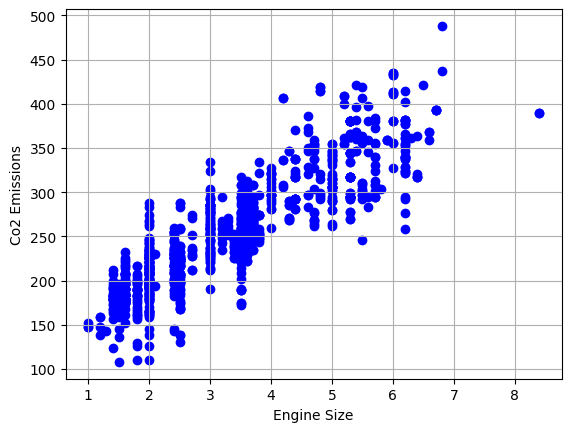

In [31]:
# Plotting these Engine Size vs Emissions

plt.scatter(emissions.enginesize, emissions.co2,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.grid()
plt.show()

Linear positive related

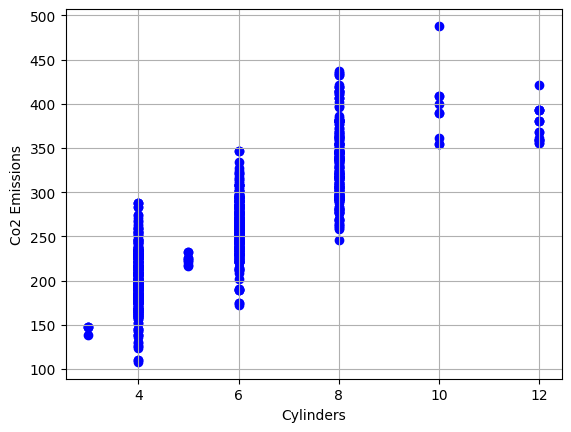

In [32]:
# Plotting these Cylinder vs Emissions

plt.scatter(emissions.cylinders, emissions.co2,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Co2 Emissions")
plt.grid()
plt.show()

#### 3.1 Train split and test

- 80% for training
- 20% for testing

In [33]:
msk=np.random.rand(len(emissions))<0.8
train=emissions[msk]
test=emissions[~msk]

#### 3.2 Simple linear regression (Engine Size Vs Co2 Emissions)

In [46]:
from sklearn import linear_model
from sklearn.metrics import r2_score

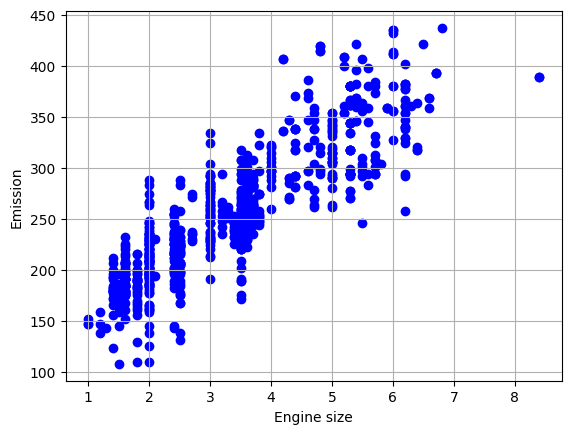

In [37]:
# Train data distribution

plt.scatter(train.enginesize, train.co2,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.grid()
plt.show()

In [39]:
# Modeling

regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["enginesize"]])
train_y=np.asanyarray(train[["co2"]])
regr.fit(train_x,train_y)

LinearRegression()

In [41]:
print ('Coefficients: ', regr.coef_[0][0].round(2))
print ('Intercept: ',regr.intercept_[0].round(2))

Coefficients:  39.06
Intercept:  126.24


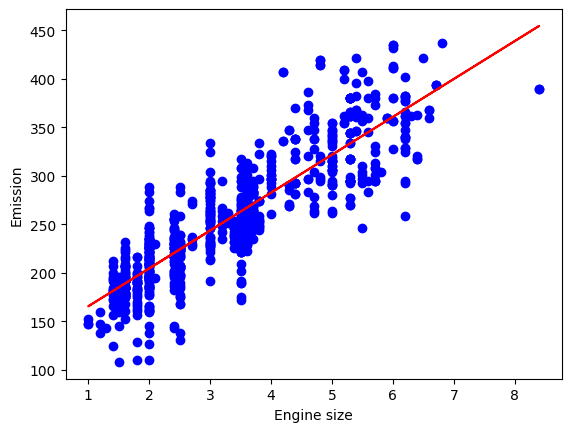

In [45]:
# Plotting outputs

plt.scatter(train.enginesize, train.co2,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [48]:
test_x = np.asanyarray(test[['enginesize']])
test_y = np.asanyarray(test[['co2']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean Squared Error (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.01
Mean Squared Error (MSE): 921.25
R2-score: 0.77


Lets see what the evaluation metrics are if we trained a regression model using Fuel Consumption.

In [51]:
train_x=train[["fuelconsumption"]]
test_x=test[["fuelconsumption"]]

In [55]:
regr=linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

In [56]:
# Predictions

predictions=regr.predict(test_x)
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 19.46


We can see that the MAE is much worse when we train using `enginesize` than `fuelconsumption`